In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load and Preprocess Dataset

print("📥 Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape (28,28) → (28,28,1) for CNN input
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode labels (optional for softmax)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"✅ Dataset loaded: {x_train.shape[0]} training images, {x_test.shape[0]} testing images")

📥 Loading MNIST dataset...
✅ Dataset loaded: 60000 training images, 10000 testing images


In [ ]:
# Build CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train Model

print("\n🚀 Training CNN model...")
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)


🚀 Training CNN model...
Epoch 1/10
422/422 - 44s - 104ms/step - accuracy: 0.9263 - loss: 0.2465 - val_accuracy: 0.9840 - val_loss: 0.0573
Epoch 2/10
422/422 - 39s - 93ms/step - accuracy: 0.9779 - loss: 0.0734 - val_accuracy: 0.9882 - val_loss: 0.0406
Epoch 3/10
422/422 - 41s - 97ms/step - accuracy: 0.9836 - loss: 0.0531 - val_accuracy: 0.9900 - val_loss: 0.0364
Epoch 4/10
422/422 - 40s - 96ms/step - accuracy: 0.9864 - loss: 0.0432 - val_accuracy: 0.9912 - val_loss: 0.0350
Epoch 5/10
422/422 - 41s - 97ms/step - accuracy: 0.9883 - loss: 0.0379 - val_accuracy: 0.9915 - val_loss: 0.0298
Epoch 6/10
422/422 - 39s - 93ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9882 - val_loss: 0.0442
Epoch 7/10
422/422 - 39s - 92ms/step - accuracy: 0.9921 - loss: 0.0254 - val_accuracy: 0.9915 - val_loss: 0.0338
Epoch 8/10
422/422 - 39s - 92ms/step - accuracy: 0.9925 - loss: 0.0224 - val_accuracy: 0.9918 - val_loss: 0.0345
Epoch 9/10
422/422 - 39s - 94ms/step - accuracy: 0.9932 - loss: 0.0200

In [ ]:

# Evaluate Model

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")



✅ Test Accuracy: 99.27%


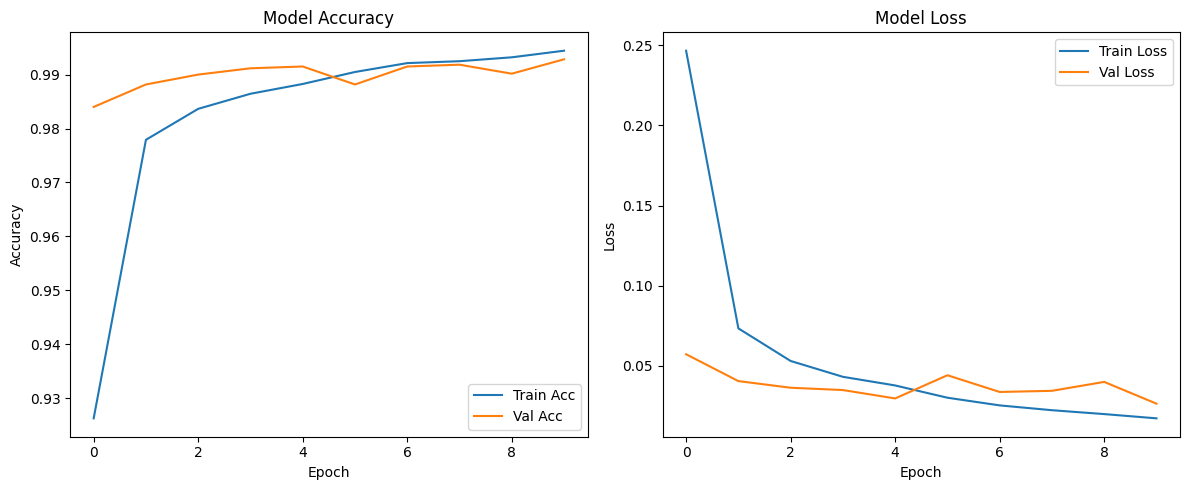

In [ ]:
# Plot Training Curves

def plot_training_curves(history):
    plt.figure(figsize=(12,5))
    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_training_curves(history)

In [ ]:
# Predict on Test Samples

predictions = model.predict(x_test[:25])
predicted_labels = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


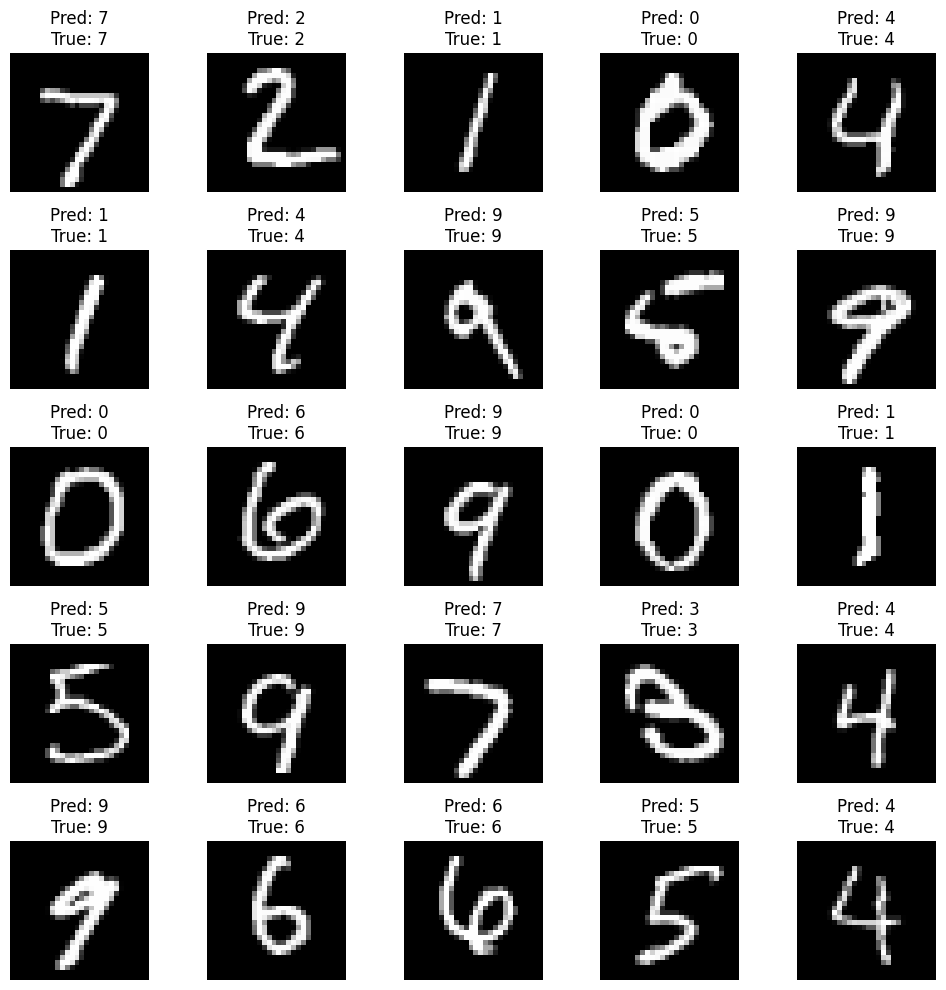

In [ ]:
# Visualize Predictions

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()